# A

In [1]:
import os
import numpy as np
from scipy.linalg import eig
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

imgloc = r'D:/Uni/Master/Mulitscale_methods/DFT/tex/images'
dataloc = r'D:\Uni\Master\Mulitscale_methods\DFT\h2-exercises\h2-exercises'

def img_loc(loc: str):
    return rf'{imgloc}/{loc}'

def data_loc(loc: str):
    return rf'{dataloc}/{loc}'

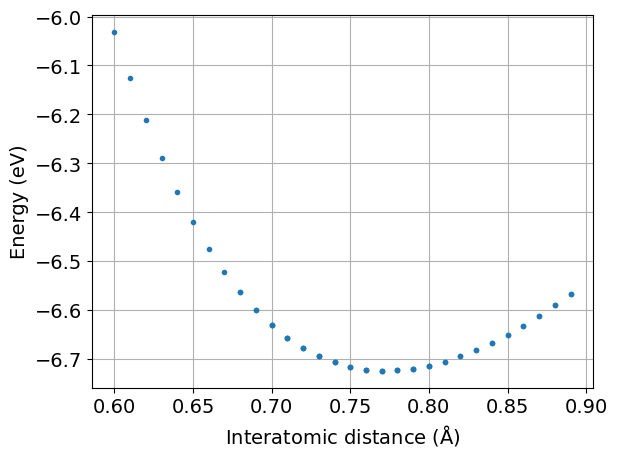

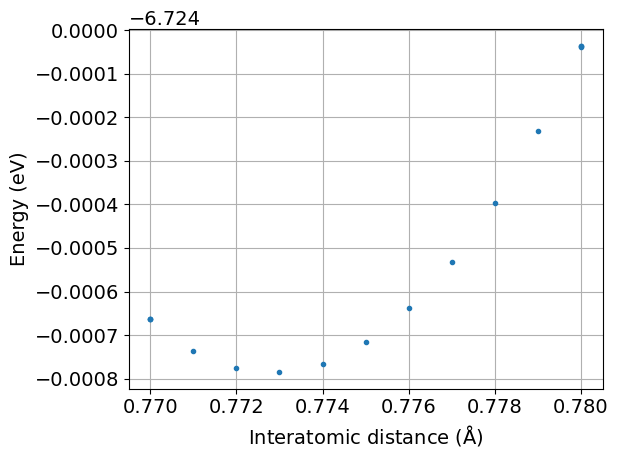

0.773


In [39]:
fileloc = r'02_H2_SP_Series_LDA\SUMMARY'
distance = []
energy = []
digits_mask = []
with open(data_loc(fileloc), 'r') as file:
    for line in file:
        if not ('F' in line):
            continue
        line = line.split(' ')
        distance.append(float(line[0]))
        energy.append(float(line[5]))
        digits_mask.append(len(line[0])==4)

distance, energy, digits_mask = np.array(distance), np.array(energy), np.array(digits_mask)

plt.figure()
plt.plot(distance[digits_mask], energy[digits_mask], '.')
plt.xlabel('Interatomic distance ($\mathrm{\AA}$)')
plt.ylabel('Energy (eV)')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('9a1.png'))
plt.show()

mask = (0.77 <= distance) & (distance <= 0.78)
plt.figure()
plt.plot(distance[mask], energy[mask], '.')
plt.xlabel('Interatomic distance ($\mathrm{\AA}$)')
plt.ylabel('Energy (eV)')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('9a2.png'))
plt.show()

print(distance[np.argmin(energy)])

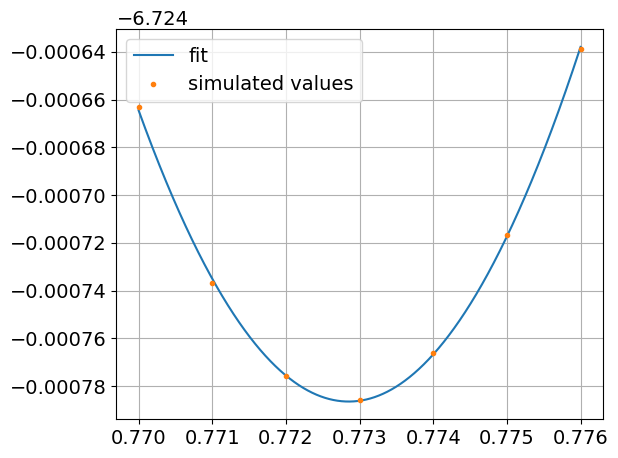

[[ 0.01932659 -0.02987891  0.01154812]
 [-0.02987891  0.04619285 -0.01785344]
 [ 0.01154812 -0.01785344  0.00690033]]
-0.7728525254129768
0.010137138732584566


In [33]:
index = np.argmin(energy)
num = 3
selected_energy = energy[index-num:index+num+1]
selected_distance = distance[index-num:index+num+1]

out, cov = np.polyfit(selected_distance, selected_energy, deg=2, cov=True)
x_vals = np.linspace(selected_distance[0], selected_distance[-1], 100000)

plt.figure()
plt.plot(x_vals, out[0]*x_vals**2 + out[1]*x_vals + out[2], label='fit')
plt.plot(selected_distance, selected_energy, '.', label='simulated values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('9a_fit.png'))
plt.show()

print(cov)
sig_a = np.sqrt(cov[0, 0])*out[1]/(2*out[0]**2)
sig_b = np.sqrt(cov[1, 1])/(2*out[0])
sig = np.sqrt(sig_a**2 + sig_b**2)
print(out[1]/(2*out[0]))
print(sig)

# B

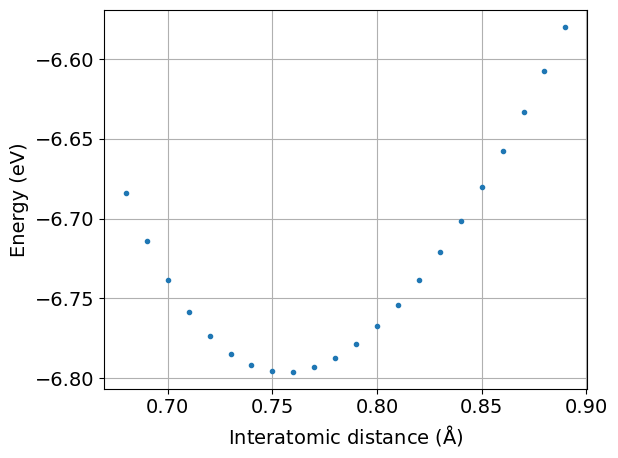

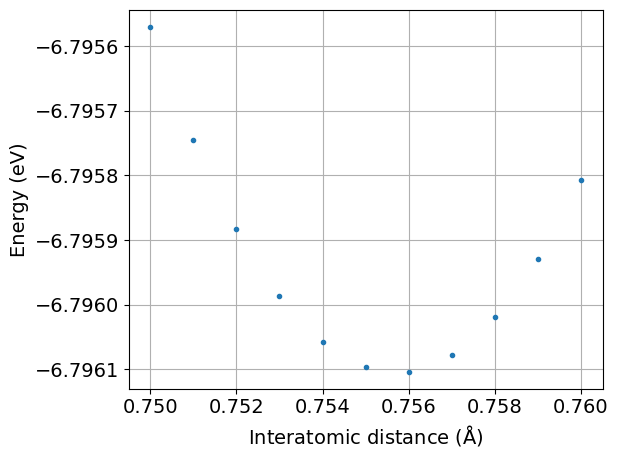

0.756


In [40]:
fileloc = r'04_H2_SP_Series_PBE\SUMMARY'
distance = []
energy = []
digits_mask = []
with open(data_loc(fileloc), 'r') as file:
    for line in file:
        if not ('F' in line):
            continue
        line = line.split(' ')
        distance.append(float(line[0]))
        energy.append(float(line[5]))
        digits_mask.append(len(line[0])==4)

distance, energy, digits_mask = np.array(distance), np.array(energy), np.array(digits_mask)

plt.figure()
plt.plot(distance[digits_mask], energy[digits_mask], '.')
plt.xlabel('Interatomic distance ($\mathrm{\AA}$)')
plt.ylabel('Energy (eV)')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('9c1.png'))
plt.show()

mask = (0.75 <= distance) & (distance <= 0.76)
plt.figure()
plt.plot(distance[mask], energy[mask], '.')
plt.xlabel('Interatomic distance ($\mathrm{\AA}$)')
plt.ylabel('Energy (eV)')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('9c2.png'))
plt.show()

print(distance[np.argmin(energy)])

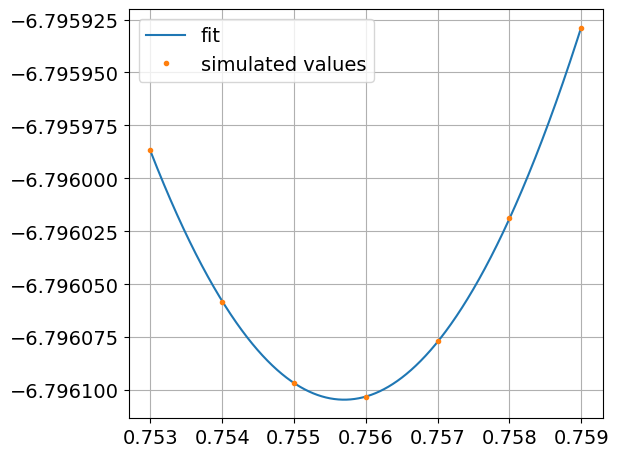

[[ 0.00097648 -0.00147644  0.00055809]
 [-0.00147644  0.00223238 -0.00084383]
 [ 0.00055809 -0.00084383  0.00031897]]
-0.7556992478430772
0.0020690457111017177


In [42]:
index = np.argmin(energy)
num = 3
selected_energy = energy[index-num:index+num+1]
selected_distance = distance[index-num:index+num+1]

out, cov = np.polyfit(selected_distance, selected_energy, deg=2, cov=True)
x_vals = np.linspace(selected_distance[0], selected_distance[-1], 100000)

plt.figure()
plt.plot(x_vals, out[0]*x_vals**2 + out[1]*x_vals + out[2], label='fit')
plt.plot(selected_distance, selected_energy, '.', label='simulated values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('9c_fit.png'))
plt.show()

print(cov)
sig_a = np.sqrt(cov[0, 0])*out[1]/(2*out[0]**2)
sig_b = np.sqrt(cov[1, 1])/(2*out[0])
sig = np.sqrt(sig_a**2 + sig_b**2)
print(out[1]/(2*out[0]))
print(sig)